In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
from IPython.display import display, Image
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.simplefilter('ignore')


%pylab inline
%config InlineBackend.figure_format = 'svg' 
from pylab import rcParams
rcParams['figure.figsize'] = 11,9

Populating the interactive namespace from numpy and matplotlib


In [4]:
auto = pd.read_csv('auto.csv')

In [7]:
auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,164,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,164,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [10]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
symboling            205 non-null int64
normalized-losses    205 non-null int64
make                 205 non-null object
fuel-type            205 non-null object
aspiration           205 non-null object
num-of-doors         205 non-null object
body-style           205 non-null object
drive-wheels         205 non-null object
engine-location      205 non-null object
wheel-base           205 non-null float64
length               205 non-null float64
width                205 non-null float64
height               205 non-null float64
curb-weight          205 non-null int64
engine-type          205 non-null object
num-of-cylinders     205 non-null object
engine-size          205 non-null int64
fuel-system          205 non-null object
bore                 205 non-null float64
stroke               205 non-null float64
compression-ratio    205 non-null float64
horsepower           205 non-nu

# 2. Рассчитать основные статистики для переменных (среднее, медиана, мода, мин/макс, сред. отклонение)

In [13]:
auto.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,126.365854,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.324878,3.253366,10.142537,106.048780,5131.463415,25.219512,30.751220,13312.712195
std,1.245307,35.438400,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.273049,0.313937,3.972040,43.468803,480.933330,6.542142,6.886443,8102.472461
min,-2.000000,65.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.130000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,150.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,120.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,256.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [14]:
auto.median(numeric_only=True)

symboling                1.00
normalized-losses      122.00
wheel-base              97.00
length                 173.20
width                   65.50
height                  54.10
curb-weight           2414.00
engine-size            120.00
bore                     3.31
stroke                   3.29
compression-ratio        9.00
horsepower              95.00
peak-rpm              5200.00
city-mpg                24.00
highway-mpg             30.00
price                10295.00
dtype: float64

In [20]:
auto.mode()
#если присутствует значение во второй строчке, значит, что в столбце несколько мод

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,0.0,161.0,toyota,gas,std,four,sedan,fwd,front,94.5,...,92,mpfi,3.62,3.4,9.0,68.0,5500.0,31.0,25.0,6785.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 3. Рассчитать и визуализировать корреляционную матрицу для переменных

In [24]:
corr = auto.corr()
corr

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
symboling,1.000000,0.497890,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.160225,-0.020132,-0.178515,0.070421,0.273125,-0.035823,0.034606,-0.080149
normalized-losses,0.497890,1.000000,-0.029810,0.051375,0.122172,-0.332532,0.152171,0.166203,0.013503,0.038636,-0.148861,0.274619,0.234561,-0.290161,-0.256047,0.199860
wheel-base,-0.531954,-0.029810,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.495108,0.164549,0.249786,0.301696,-0.363355,-0.470414,-0.544082,0.571784
length,-0.357612,0.051375,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.608905,0.132076,0.158414,0.521192,-0.279406,-0.670909,-0.704662,0.678818
width,-0.232919,0.122172,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.556374,0.183379,0.181129,0.596251,-0.214240,-0.642704,-0.677218,0.764977
height,-0.541038,-0.332532,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.199995,-0.044176,0.261214,-0.114968,-0.322525,-0.048640,-0.107358,0.112421
curb-weight,-0.227691,0.152171,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648219,0.170425,0.151362,0.679865,-0.264976,-0.757414,-0.797465,0.835657
engine-size,-0.105790,0.166203,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.602516,0.211477,0.028971,0.742119,-0.241031,-0.653658,-0.677470,0.870751
bore,-0.160225,0.013503,0.495108,0.608905,0.556374,0.199995,0.648219,0.602516,1.000000,-0.049492,0.008511,0.537543,-0.276942,-0.556570,-0.562065,0.549438
stroke,-0.020132,0.038636,0.164549,0.132076,0.183379,-0.044176,0.170425,0.211477,-0.049492,1.000000,0.187134,0.164722,-0.051970,-0.033609,-0.036502,0.079775


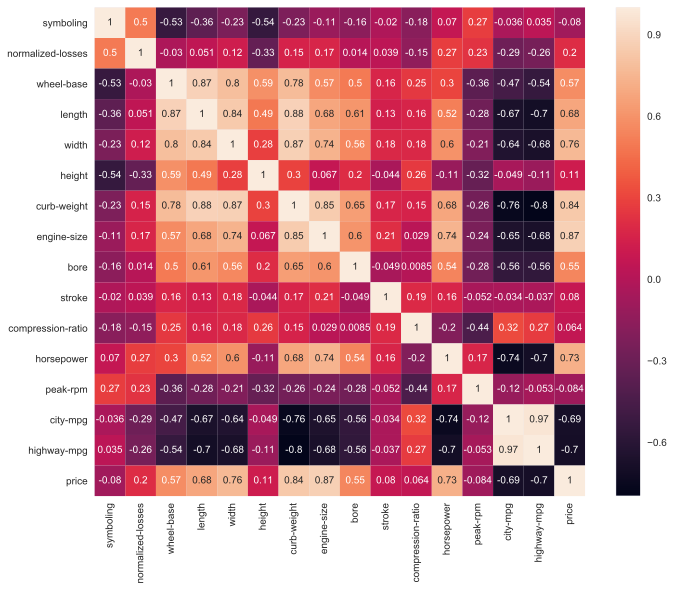

In [54]:
#Можем видеть, что цена достаточно сильно положительно коррелирует с wheel-base, length, curb-weight, engine-seze
#Достаточно сильная отрицательная корреляция наблюдается между ценой и city-mpg

sns.heatmap(corr, annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values);

# 4. Визуализировать распределение переменной ‘Price’, рассчитать показатели skewness и kurtosis

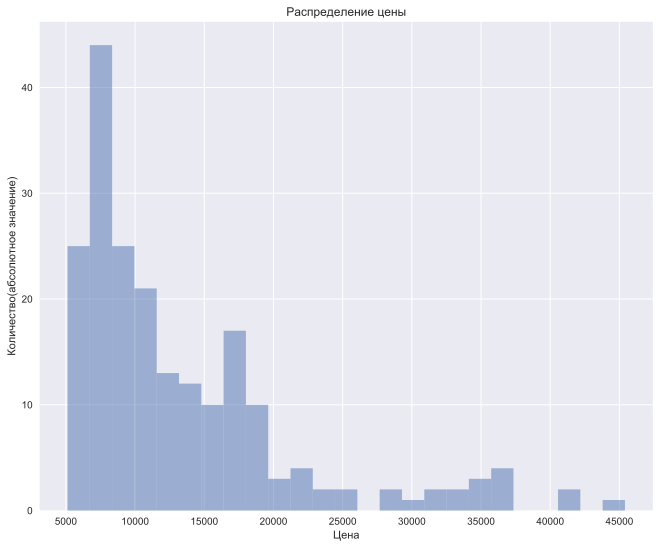

In [52]:
ax = auto['price'].hist(alpha=0.5,bins=25)
ax.set_xlabel('Цена')
ax.set_ylabel('Количество(абсолютное значение)')
ax.set_title('Распределение цены');

Kurtosis is a measure of the “peaked ness”. Distributions with higher peaks have positive kurtosis and vice-versa

In [43]:
print('Kurtosis of price: %0.3f' % auto.price.kurtosis())

Kurtosis of price: 2.949


Skewness: Skewness is a measure of the asymmetry. Negatively skewed curve has a long left tail and vice versa.

In [42]:
print('Skew of price: %0.3f' % auto.price.skew())

Skew of price: 1.766


Нарисуем распределение с помощью Seaborn

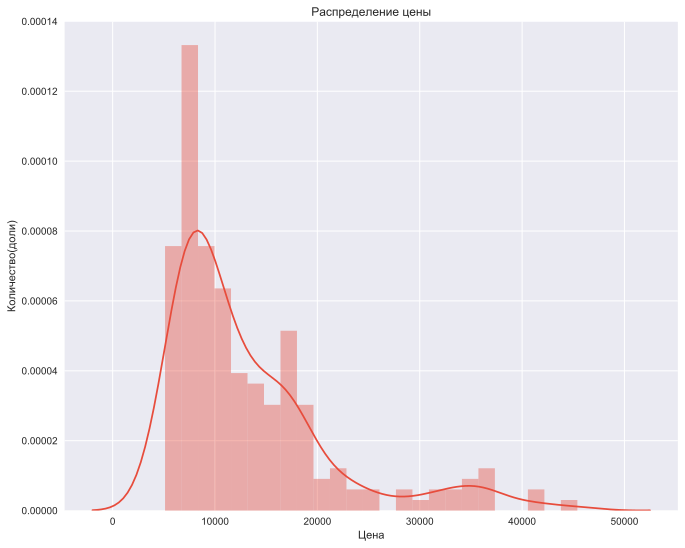

In [51]:
ax = sns.distplot(auto['price'], bins = 25, color = "#e74c3c")
ax.set_xlabel('Цена')
ax.set_ylabel('Количество(доли)')
ax.set_title('Распределение цены');

Можем видеть, что распределение цены далеко от нормального, наблюдается достаточно продолговатый хвост с правой стороны ( о чем нам также говорит показатель skew)разброс цен достаточно большой (о чем нам говорил также высокий показатель std в 1 задании), в основном цены сосредоточены в низкой ценовой категории, однако, мы также можем наблюдать небольшую вторую вершину у графика, между 30000 и 40000. Это может говорить о присутствии некоторой второй более высокой ценовой категории на рынке машин, где машины представлены в меньшем количестве.

# 5. Визуализировать несколько взаимосвязей между переменными

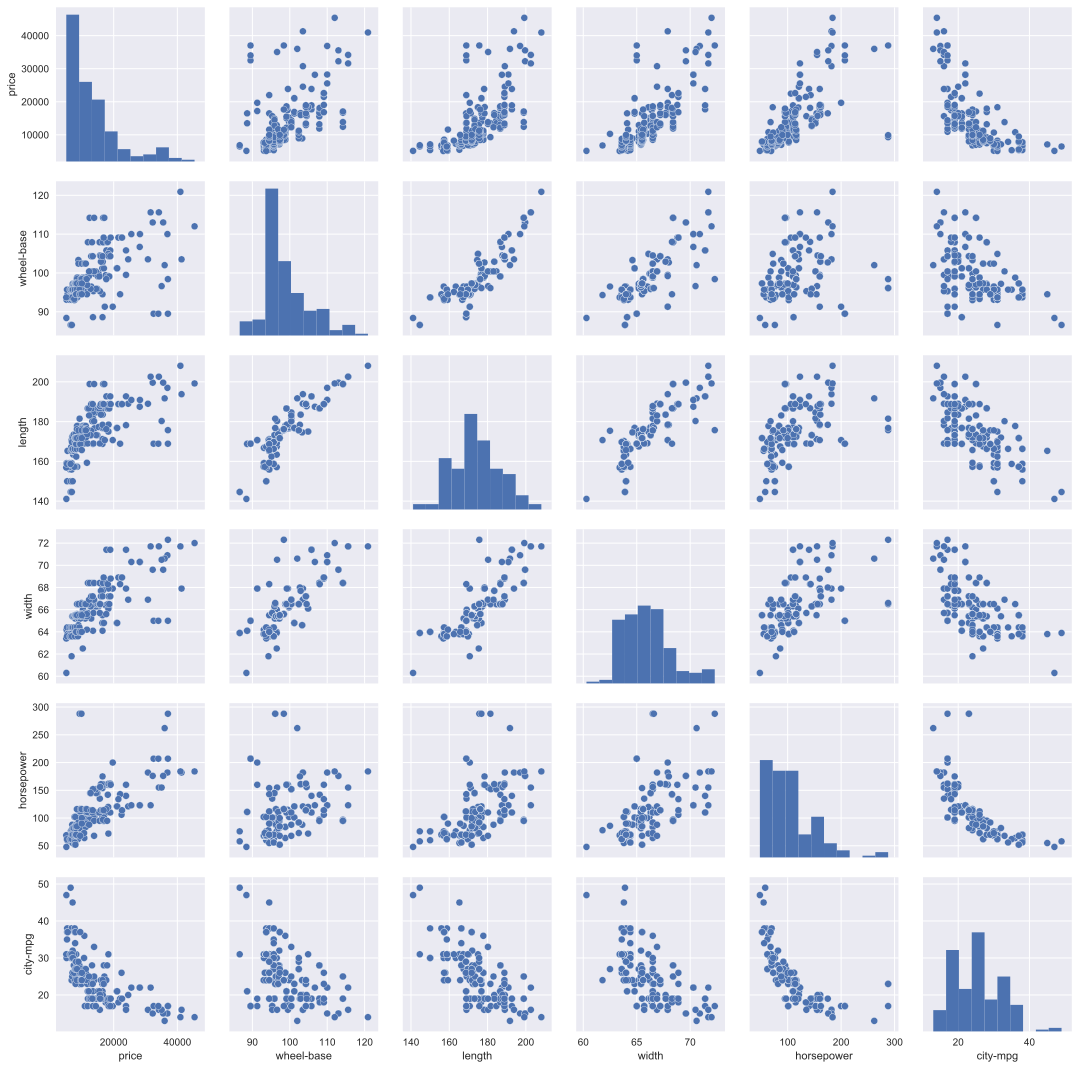

In [53]:
sns.pairplot(auto,  vars=['price', 'wheel-base', 'length', 'width','horsepower','city-mpg'],
                 kind='scatter')  

Все рассматриваемые показатели (кроме city-mpg) имеют положительную корреляцию. Например, рост horsepower сопровождается ростом цены, однако, рост city-mpg сопровождается падением цены.